Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:                              
• Read the dataset into a pandas DataFrame.          
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset2/diabetes_.csv')

print(df.info())

print("\nMissing values:\n", df.isnull().sum())

print("\nSummary statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age    

2. Handle Missing Data:                                            
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset2/diabetes_.csv')

# Display basic info
print(data.head())
print(data.info())

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Drop categorical columns (KNN needs numeric data)
data = data.drop(columns=categorical_columns)

# Check missing values percentage
missing_info = data.isnull().sum() / len(data) * 100
print("\nMissing value percentage:\n", missing_info)

# Handle missing values
for column in data.columns:
    if missing_info[column] > 10:
        # Impute with mean if more than 10% missing
        data[column] = data[column].fillna(data[column].mean())
    else:
        # Drop rows if less than or equal to 10% missing
        data = data.dropna(subset=[column])

# Display cleaned data
print("\nData after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

3. Feature Engineering:                                            
• Separate the feature matrix (X) and target variable (y).         
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [8]:
import numpy as np

# Separate features (X) and target (y)
X = data.drop(columns=['Outcome']).values   # Features
y = data['Outcome'].values                  # Target

# Define train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.7, random_seed=42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)

    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:                                                  
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).                                             
• Compute distances using Euclidean distance.                      
• Write functions for:                                             
– Predicting the class for a single query.                         
– Predicting classes for all test samples.                                                                           
• Evaluate the performance using accuracy.

In [21]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.
    Returns:
    float
        The Euclidean distance between the two points.
    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

    # Test case for the function
try:
    # Define two points
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])

    # Calculate the distance
    result = euclidean_distance(point1, point2)

    # Check if the result matches the expected value (sqrt(3^2 + 4^2) = 5)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")

except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction
# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

# Assume X_train, X_test, y_train, and y_test have been prepared using the code above
try:
    # Define the test set for the test case
    X_test_sample = X_test[:5]  # Taking a small subset for testing
    y_test_sample = y_test[:5]  # Corresponding labels for the subset

    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    # Print test results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    # Check if predictions match expected format
    assert predictions.shape == y_test_sample.shape, \
        "The shape of predictions does not match the shape of the actual labels."

    print("Test case passed successfully!")

except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Perform prediction on the entire test set
try:
    # Make predictions on the entire test set
    predictions = knn_predict(X_test, X_train, y_train, k=3)

    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)

    # Print the accuracy
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")

except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Test passed successfully!
Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!
Accuracy of the KNN model on the test set: 67.39%


Problem - 2 - Experimentation:

In [24]:

# 1. Scale the feature matrix using Min-Max scaling
def min_max_scale(X):
    X_scaled = X.astype(float)
    for i in range(X.shape[1]):
        min_val = X[:, i].min()
        max_val = X[:, i].max()
        if max_val - min_val != 0:
            X_scaled[:, i] = (X[:, i] - min_val) / (max_val - min_val)
    return X_scaled

X_scaled = min_max_scale(X)

# 2. Train-Test Split for scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y)

# 3. Run KNN on scaled data
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)

# 4. Compute accuracy
accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)

# 5. Compare with original dataset accuracy (from Problem 1)
print(f"Accuracy on original data: {accuracy:.2f}%")
print(f"Accuracy on scaled data: {accuracy_scaled:.2f}%")

# 6. Analysis
print("\nAnalysis:")
if accuracy_scaled > accuracy:
    print("- Scaling improved KNN performance by balancing feature contributions.")
elif accuracy_scaled < accuracy:
    print("- Scaling slightly reduced accuracy, possibly because original feature magnitudes were informative.")
else:
    print("- Scaling did not change accuracy; features were already balanced in scale.")
print("- KNN is sensitive to feature scales because it relies on Euclidean distance.")


Accuracy on original data: 67.39%
Accuracy on scaled data: 69.13%

Analysis:
- Scaling improved KNN performance by balancing feature contributions.
- KNN is sensitive to feature scales because it relies on Euclidean distance.


Problem - 3 - Experimentation with k:


Experimentation complete!


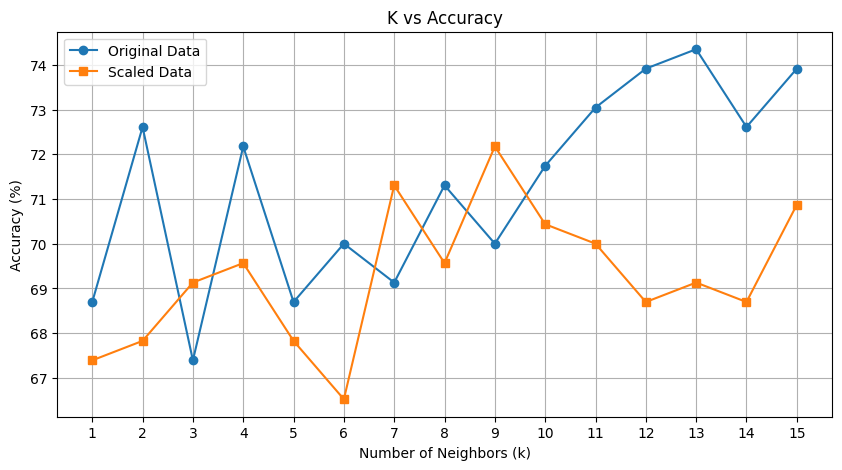

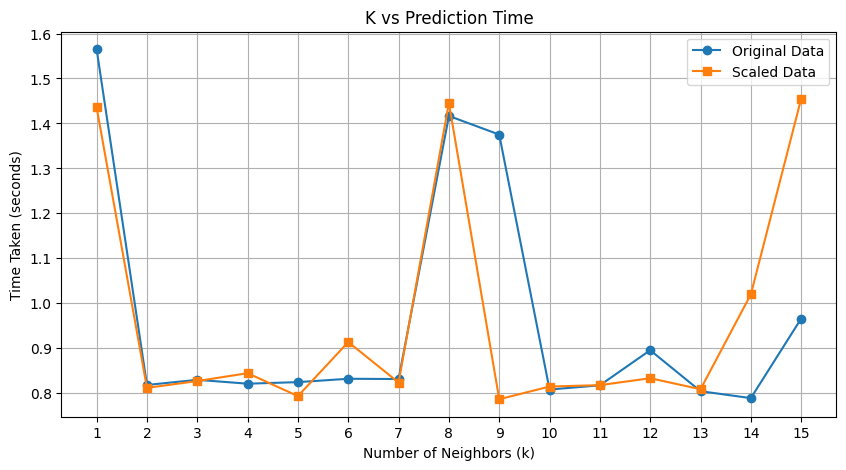

In [26]:
import time
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(1, 16)

# Lists to store results
accuracy_original_list = []
accuracy_scaled_list = []
time_original_list = []
time_scaled_list = []

# Loop through k values
for k in k_values:
    # ---- Original dataset ----
    start_time = time.time()
    predictions_orig = knn_predict(X_test, X_train, y_train, k=k)
    elapsed_time = time.time() - start_time
    accuracy_orig = compute_accuracy(y_test, predictions_orig)

    accuracy_original_list.append(accuracy_orig)
    time_original_list.append(elapsed_time)

    # ---- Scaled dataset ----
    start_time = time.time()
    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=k)
    elapsed_time = time.time() - start_time
    accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)

    accuracy_scaled_list.append(accuracy_scaled)
    time_scaled_list.append(elapsed_time)

print("Experimentation complete!")
# ---- Accuracy vs k ----
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracy_original_list, marker='o', label='Original Data')
plt.plot(k_values, accuracy_scaled_list, marker='s', label='Scaled Data')
plt.title("K vs Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# ---- Time vs k ----
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original_list, marker='o', label='Original Data')
plt.plot(k_values, time_scaled_list, marker='s', label='Scaled Data')
plt.title("K vs Prediction Time")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Time Taken (seconds)")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()